In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [2]:
sw_ev = pd.read_excel('Statewise number of different type of electric vehicles 2022.xlsx', sheet_name=0)

In [3]:
sw_ev.head()

,Sr. No.,State Name,2WN,2WT,2WIC,3WN,3WT,LMV,LPV,LGV,4WIC,MMV,MPV,MGV,HPV,HGV,OTH,Grand Total
0,1,Andaman & Nicobar Island,2,5.0,NaN,NaN,30.0,86,6.0,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,169
1,2,Andhra Pradesh,27629,NaN,2.0,374.0,108.0,1050,3.0,166.0,NaN,NaN,NaN,NaN,NaN,NaN,1117.0,30449
2,3,Arunachal Pradesh,14,NaN,NaN,NaN,NaN,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21
3,4,Assam,2287,NaN,NaN,NaN,79661.0,233,5.0,15.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,82216
4,5,Bihar,13472,NaN,NaN,2.0,96560.0,231,8.0,21.0,1.0,NaN,NaN,1.0,27.0,2.0,NaN,110325


In [4]:
sw_ev["State Name"].unique()

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'UT of DNH and DD', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', nan], dtype=object)

In [5]:
sw_ev.dtypes

Sr. No.         object
State Name      object
 2WN             int64
 2WT           float64
 2WIC          float64
 3WN           float64
 3WT           float64
 LMV             int64
 LPV           float64
 LGV           float64
 4WIC          float64
 MMV           float64
 MPV           float64
 MGV           float64
 HPV           float64
 HGV           float64
 OTH           float64
Grand Total      int64
dtype: object

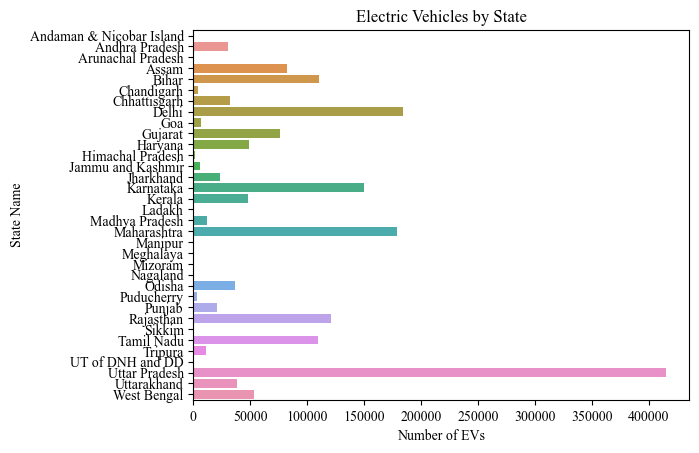

In [6]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='Grand Total', y='State Name', data=sw_ev.iloc[:-1,:])

plt.xlabel('Number of EVs')
plt.ylabel('State Name')
plt.title('Electric Vehicles by State')

plt.show()

In [7]:
sw_pcs = pd.read_excel('Statewise operational Public EV Charging Stations 2023.xlsx', sheet_name=0)

In [8]:
sw_pcs.head()

,S. No.,State Name,No. of Operational PCS
0,1,Andaman & Nicobar,3
1,2,Andhra Pradesh,222
2,3,Arunachal Pradesh,9
3,4,Assam,48
4,5,Bihar,83


In [9]:
sw_pcs.dtypes

S. No.                    object
State Name                object
No. of Operational PCS     int64
dtype: object

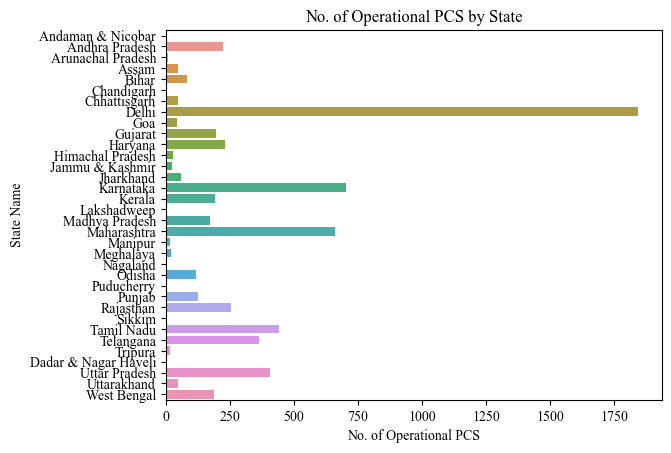

In [10]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='No. of Operational PCS', y='State Name', data=sw_pcs.iloc[:-1,:])

plt.xlabel('No. of Operational PCS')
plt.ylabel('State Name')
plt.title('No. of Operational PCS by State')

plt.show()

In [11]:
sw_ev['State Name'].unique()

array(['Andaman & Nicobar Island', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'UT of DNH and DD', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', nan], dtype=object)

In [12]:
sw_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Dadar & Nagar Haveli', 'Uttar Pradesh', 'Uttarakhand',
       'West Bengal', nan], dtype=object)

In [13]:
uncommon_elements = list(set(sw_ev['State Name'].unique()) ^ set(sw_pcs['State Name'].unique()))

print(uncommon_elements )

['Dadar & Nagar Haveli', 'Andaman & Nicobar Island', 'Jammu and Kashmir', 'Mizoram', 'Jammu & Kashmir', 'Lakshadweep', 'Andaman & Nicobar', 'UT of DNH and DD', 'Telangana', 'Ladakh']


In [14]:
replacements = {'Andaman & Nicobar Island': 'Andaman & Nicobar', 'Jammu and Kashmir': 'Jammu & Kashmir', 'UT of DNH and DD': 'Dadar & Nagar Haveli'}

sw_ev['State Name'] = sw_ev['State Name'].replace(replacements)

In [15]:
sw_ev_pcs = pd.merge(sw_ev[['State Name','Grand Total']].iloc[:-1], sw_pcs[['State Name','No. of Operational PCS']].iloc[:-1], how='outer', left_on='State Name', right_on='State Name')

In [16]:
sw_ev_pcs = sw_ev_pcs.rename(columns={'Grand Total': 'Total EV'})

In [17]:
sw_ev_pcs.head(40)

,State Name,Total EV,No. of Operational PCS
0,Andaman & Nicobar,169.0,3.0
1,Andhra Pradesh,30449.0,222.0
2,Arunachal Pradesh,21.0,9.0
3,Assam,82216.0,48.0
4,Bihar,110325.0,83.0
5,Chandigarh,4161.0,6.0
6,Chhattisgarh,31992.0,46.0
7,Delhi,183741.0,1845.0
8,Goa,6559.0,44.0
9,Gujarat,75655.0,195.0


In [18]:
sw_ev_pcs.isnull().sum()

State Name                0
Total EV                  2
No. of Operational PCS    2
dtype: int64

In [19]:
average_ev_per_pcs = sw_ev_pcs['Total EV'].mean() / sw_ev_pcs['No. of Operational PCS'].mean()

average_pcs_per_ev = sw_ev_pcs['No. of Operational PCS'].mean()/ sw_ev_pcs['Total EV'].mean()

print("Average EVs per PCS:", average_ev_per_pcs)
print("Average PCS per EV:", average_pcs_per_ev)

Average EVs per PCS: 273.7575159429092
Average PCS per EV: 0.0036528677452221815


In [20]:
sw_ev_pcs['Total EV'] = sw_ev_pcs['Total EV'].fillna(round(average_ev_per_pcs * sw_ev_pcs['No. of Operational PCS'])).astype(int)

In [21]:
sw_ev_pcs['No. of Operational PCS'] = sw_ev_pcs['No. of Operational PCS'].fillna(round(average_pcs_per_ev * sw_ev_pcs['Total EV'])).astype(int)

In [22]:
correlation, p_value = pearsonr(sw_ev_pcs['Total EV'], sw_ev_pcs['No. of Operational PCS'])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.597973064282277
P-value: 0.00011742824302514641


In [23]:
sw_ro = pd.read_excel('Statewise number of RO with EV charging facility.xlsx', sheet_name=0)

In [24]:
sw_ro.head()

,State/UT,No of RO's where EV Charging Facility available
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


In [25]:
sw_ro['State/UT'] = sw_ro['State/UT'].str.strip()

In [26]:
sw_ro.dtypes

State/UT                                           object
No of RO's where EV Charging Facility available     int64
dtype: object

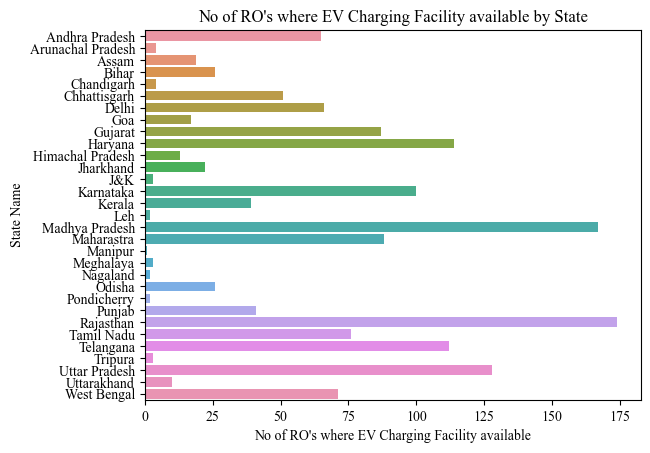

In [27]:
plt.rcParams["font.family"] = "Times New Roman"
sns.barplot(x='''No of RO's where EV Charging Facility available''', y='State/UT', data=sw_ro.iloc[:-1,:])

plt.xlabel('''No of RO's where EV Charging Facility available''')
plt.ylabel('State Name')
plt.title('''No of RO's where EV Charging Facility available by State''')

plt.show()

In [28]:
sw_ev_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Dadar & Nagar Haveli', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Lakshadweep', 'Telangana'],
      dtype=object)

In [29]:
sw_ro['State/UT'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'J&K', 'Karnataka', 'Kerala',
       'Leh', 'Madhya Pradesh', 'Maharastra', 'Manipur', 'Meghalaya',
       'Nagaland', 'Odisha', 'Pondicherry', 'Punjab', 'Rajasthan',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Grand Total'], dtype=object)

In [30]:
uncommon_elements = list(set(sw_ev_pcs['State Name'].unique()) ^ set(sw_ro['State/UT'].unique()))

print(uncommon_elements )

['Dadar & Nagar Haveli', 'Pondicherry', 'Maharashtra', 'Puducherry', 'Mizoram', 'Jammu & Kashmir', 'Maharastra', 'Leh', 'Lakshadweep', 'Andaman & Nicobar', 'Sikkim', 'J&K', 'Ladakh', 'Grand Total']


In [31]:
replacements = {'Leh': 'Ladakh', 'J&K': 'Jammu & Kashmir', 'Maharastra': 'Maharashtra', 'Pondicherry': 'Puducherry'}

sw_ro['State/UT'] = sw_ro['State/UT'].replace(replacements)

In [32]:
sw_ev_ro_pcs = pd.merge(sw_ev_pcs, sw_ro.iloc[:-1], how='outer', left_on='State Name', right_on='State/UT').drop('State/UT', axis=1)

In [33]:
sw_ev_ro_pcs.head(40)

,State Name,Total EV,No. of Operational PCS,No of RO's where EV Charging Facility available
0,Andaman & Nicobar,169,3,NaN
1,Andhra Pradesh,30449,222,65.0
2,Arunachal Pradesh,21,9,4.0
3,Assam,82216,48,19.0
4,Bihar,110325,83,26.0
5,Chandigarh,4161,6,4.0
6,Chhattisgarh,31992,46,51.0
7,Delhi,183741,1845,66.0
8,Goa,6559,44,17.0
9,Gujarat,75655,195,87.0


In [34]:
sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''] = sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''].fillna(0)

In [35]:
sw_ev_ro_pcs.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
dtype: int64

In [36]:
correlation, p_value = pearsonr(sw_ev_ro_pcs['''Total EV'''], sw_ev_ro_pcs['''No of RO's where EV Charging Facility available'''])

print("Correlation coefficient:", correlation)
print("P-value:", p_value)

Correlation coefficient: 0.599126932587745
P-value: 0.0001130187890379565


In [37]:
nh_pcs = pd.read_excel('National highway wise operational Public EV Charging Stations 2023.xlsx', sheet_name=0).iloc[:-1]

In [38]:
nh_pcs.head(100)

,National Highway,No. of operational PCS
0,National Highway-10,1
1,National Highway-11,3
2,National Highway-128,1
3,National Highway-13,3
4,National Highway-130,1
...,...,...
85,National Highway-766,2
86,National Highway-8,12
87,National Highway-86,2
88,National Highway-9,15


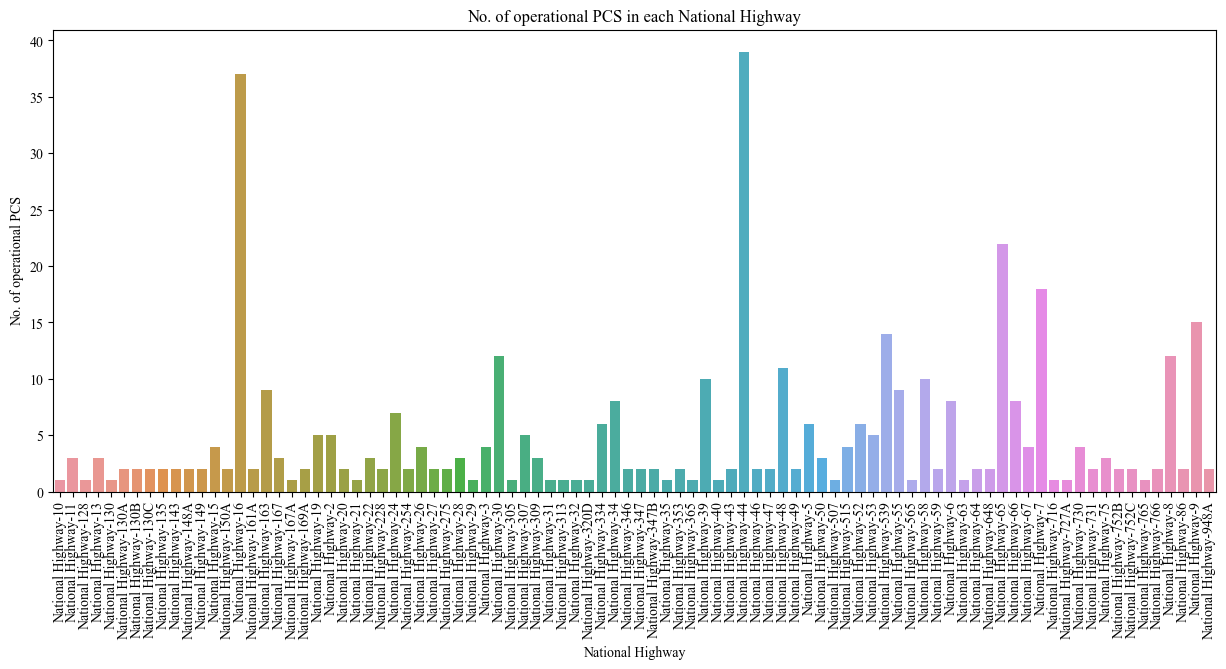

In [39]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(15, 6))
sns.barplot(x='''National Highway''', y='No. of operational PCS', data=nh_pcs)

plt.xlabel('National Highway')
plt.xticks(rotation=90)
plt.ylabel('No. of operational PCS')
plt.title('''No. of operational PCS in each National Highway''')

plt.show()

In [40]:
nh_pcs['National Highway'] = nh_pcs['National Highway'].str.extract(r'(\d+)').astype(int)

In [41]:
nh_pcs.head(95)

,National Highway,No. of operational PCS
0,10,1
1,11,3
2,128,1
3,13,3
4,130,1
...,...,...
85,766,2
86,8,12
87,86,2
88,9,15


In [42]:
sw_nh = pd.read_excel('Highways in each state.xlsx', sheet_name=0)

In [43]:
sw_nh

,NH,State
0,1,Jammu and Kashmir
1,301,Jammu and Kashmir
2,501,Jammu and Kashmir
3,701,Jammu and Kashmir
4,2,Assam
...,...,...
851,344P,Haryana
852,NE-1,Gujarat
853,NE-2,Uttar Pradesh
854,NE-3,Haryana


In [44]:
sw_nh['State'].unique()

array(['Jammu and Kashmir', 'Assam', 'Nagaland', 'Manipur', 'Mizoram',
       'Punjab', 'Himachal Pradesh', 'Haryana', 'A & N Islands',
       'Chandigarh', 'Meghalaya', 'Uttarakhand', 'Uttar Pradesh',
       'Tripura', 'Delhi', 'Rajasthan', 'Sikkim', 'West Bengal',
       'Arunachal Pradesh', 'Jharkhand', 'Andhra Pradesh', 'Orissa',
       'Tamil Nadu', 'Bihar', 'Madhya Pradesh', nan, 'Gujarat',
       'AndhraPradesh', 'Chhattisgarh', 'Telangana', 'Maharashtra',
       'Puducherry', 'Karnataka', 'Kerala', 'Goa',
       'Dadar Nagar Havali (U.T)', 'Daman & Diu'], dtype=object)

In [45]:
sw_nh_filtered = sw_nh[sw_nh['State'] != 'Daman & Diu']

In [46]:
sw_nh=sw_nh_filtered.copy()

In [47]:
replacements = {'AndhraPradesh': 'Andhra Pradesh'}

sw_nh['State'] = sw_nh['State'].replace(replacements)

In [48]:
sw_no_of_hw = sw_nh.groupby('State').size().reset_index(name='Number of highways through state')

sw_no_of_hw.head()

,State,Number of highways through state
0,A & N Islands,1
1,Andhra Pradesh,36
2,Arunachal Pradesh,13
3,Assam,35
4,Bihar,47


In [49]:
sw_no_of_hw['State'].unique()

array(['A & N Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadar Nagar Havali (U.T)',
       'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu and Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Orissa', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal'], dtype=object)

In [50]:
matching_NH = sw_nh['NH'].isin(nh_pcs['National Highway'])

sw_nh_pcs = sw_nh[matching_NH]

In [51]:
sw_nh_pcs.head()

,NH,State
4,2,Assam
5,2,Nagaland
6,2,Manipur
7,2,Mizoram
25,3,Punjab


In [52]:
merged_df = pd.merge(sw_nh_pcs, nh_pcs, left_on='NH', right_on='National Highway', how='left')

# Group by 'state' and calculate the number of highways and total number of pcs
sw_nh_pcs_agg = merged_df.groupby('State').agg({'NH': 'nunique', 'No. of operational PCS': 'sum'}).reset_index()
sw_nh_pcs_agg = sw_nh_pcs_agg.rename(columns={'NH': 'Number of Highway through state with PCS', 'No. of operational PCS': 'Total PCS on the highways passing through state'})

In [53]:
sw_nh_pcs_agg.head(50)

,State,Number of Highway through state with PCS,Total PCS on the highways passing through state
0,Andhra Pradesh,10,53
1,Arunachal Pradesh,4,12
2,Assam,6,34
3,Bihar,4,7
4,Chandigarh,1,6
5,Chhattisgarh,8,40
6,Delhi,1,15
7,Goa,1,8
8,Gujarat,4,19
9,Haryana,6,50


In [54]:
sw_nh_with_pcs = pd.merge(sw_no_of_hw, sw_nh_pcs_agg, how='outer', left_on='State', right_on='State')

In [55]:
sw_nh_with_pcs.head()

,State,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state
0,A & N Islands,1,NaN,NaN
1,Andhra Pradesh,36,10.0,53.0
2,Arunachal Pradesh,13,4.0,12.0
3,Assam,35,6.0,34.0
4,Bihar,47,4.0,7.0


In [56]:
sw_nh_with_pcs.isnull().sum()

State                                              0
Number of highways through state                   0
Number of Highway through state with PCS           2
Total PCS on the highways passing through state    2
dtype: int64

In [57]:
sw_nh_with_pcs = sw_nh_with_pcs.fillna(0)

In [58]:
sw_nh_with_pcs.head(50)

,State,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state
0,A & N Islands,1,0.0,0.0
1,Andhra Pradesh,36,10.0,53.0
2,Arunachal Pradesh,13,4.0,12.0
3,Assam,35,6.0,34.0
4,Bihar,47,4.0,7.0
5,Chandigarh,1,1.0,6.0
6,Chhattisgarh,20,8.0,40.0
7,Dadar Nagar Havali (U.T),1,0.0,0.0
8,Delhi,10,1.0,15.0
9,Goa,5,1.0,8.0


In [59]:
sw_nh_with_pcs['Number of Highway through state with PCS'] = sw_nh_with_pcs['Number of Highway through state with PCS'].astype(int)

In [60]:
sw_nh_with_pcs['Total PCS on the highways passing through state'] = sw_nh_with_pcs['Total PCS on the highways passing through state'].astype(int)

In [61]:
sw_nh_with_pcs.head()

,State,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state
0,A & N Islands,1,0,0
1,Andhra Pradesh,36,10,53
2,Arunachal Pradesh,13,4,12
3,Assam,35,6,34
4,Bihar,47,4,7


In [62]:
uncommon_elements = list(set(sw_nh_with_pcs['State'].unique()) ^ set(sw_ev_ro_pcs['State Name'].unique()))

print(uncommon_elements )

['Dadar & Nagar Haveli', 'Odisha', 'Dadar Nagar Havali (U.T)', 'Jammu and Kashmir', 'Jammu & Kashmir', 'A & N Islands', 'Lakshadweep', 'Andaman & Nicobar', 'Orissa', 'Ladakh']


In [63]:
sw_ev_ro_pcs['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Dadar & Nagar Haveli', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Lakshadweep', 'Telangana'],
      dtype=object)

In [64]:
replacements = {'Jammu and Kashmir' : 'Jammu & Kashmir',  'Dadar Nagar Havali (U.T)': 'Dadar & Nagar Haveli' , 'Orissa' : 'Odisha' 
                ,'A & N Islands' : 'Andaman & Nicobar' }

sw_nh_with_pcs['State'] = sw_nh_with_pcs['State'].replace(replacements)

In [65]:
sw_nh_with_pcs['State'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Dadar & Nagar Haveli', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

In [66]:
sw_ev_ro_pcs_with_nh = pd.merge(sw_ev_ro_pcs, sw_nh_with_pcs, how='outer', left_on='State Name', right_on='State').drop('State', axis=1)

In [67]:
sw_ev_ro_pcs_with_nh.head(50)

,State Name,Total EV,No. of Operational PCS,No of RO's where EV Charging Facility available,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state
0,Andaman & Nicobar,169,3,0.0,1.0,0.0,0.0
1,Andhra Pradesh,30449,222,65.0,36.0,10.0,53.0
2,Arunachal Pradesh,21,9,4.0,13.0,4.0,12.0
3,Assam,82216,48,19.0,35.0,6.0,34.0
4,Bihar,110325,83,26.0,47.0,4.0,7.0
5,Chandigarh,4161,6,4.0,1.0,1.0,6.0
6,Chhattisgarh,31992,46,51.0,20.0,8.0,40.0
7,Delhi,183741,1845,66.0,10.0,1.0,15.0
8,Goa,6559,44,17.0,5.0,1.0,8.0
9,Gujarat,75655,195,87.0,33.0,4.0,19.0


In [68]:
sw_ev_ro_pcs_with_nh = sw_ev_ro_pcs_with_nh.fillna(0)

In [69]:
sw_ev_ro_pcs_with_nh.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
dtype: int64

In [70]:
ev_chr_sanc = pd.read_excel('Number of EV charger sanctioned for each state 2022.xlsx', sheet_name=0).iloc[:-1]

In [71]:
ev_chr_sanc.head()

,State,No. of EV chargers sanctioned
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207


In [72]:
uncommon_elements = list(set(sw_ev_ro_pcs_with_nh['State Name'].unique()) ^ set(ev_chr_sanc['State'].unique()))

print(uncommon_elements )

['Lakshadweep', 'Punjab', 'Dadar & Nagar Haveli', 'Andaman & Nicobar', 'Andaman and Nicobar (Port Blair)', 'Goa', 'Arunachal Pradesh', 'Jharkhand', 'Nagaland', 'Tripura', 'Ladakh', 'Mizoram', 'Manipur']


In [73]:
sw_ev_ro_pcs_with_nh['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Dadar & Nagar Haveli', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Lakshadweep', 'Telangana'],
      dtype=object)

In [74]:
ev_chr_sanc['State'].unique()

array(['Maharashtra', 'Andhra Pradesh', 'Tamil Nadu', 'Gujarat',
       'Uttar Pradesh', 'Rajasthan', 'Karnataka', 'Madhya Pradesh',
       'West Bengal', 'Telangana', 'Kerala', 'Delhi', 'Chandigarh',
       'Haryana', 'Meghalaya', 'Bihar', 'Sikkim', 'Jammu & Kashmir',
       'Chhattisgarh', 'Assam', 'Odisha', 'Uttarakhand', 'Puducherry',
       'Andaman and Nicobar (Port Blair)', 'Himachal Pradesh'],
      dtype=object)

In [75]:
replacements = {'Andaman and Nicobar (Port Blair)' : 'Andaman & Nicobar' }

ev_chr_sanc['State'] = ev_chr_sanc['State'].replace(replacements)

In [76]:
sw_ev_desc = pd.merge(sw_ev_ro_pcs_with_nh, ev_chr_sanc, how='outer', left_on='State Name', right_on='State').drop('State', axis=1)

In [77]:
sw_ev_desc.head()

,State Name,Total EV,No. of Operational PCS,No of RO's where EV Charging Facility available,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state,No. of EV chargers sanctioned
0,Andaman & Nicobar,169,3,0.0,1.0,0.0,0.0,10.0
1,Andhra Pradesh,30449,222,65.0,36.0,10.0,53.0,266.0
2,Arunachal Pradesh,21,9,4.0,13.0,4.0,12.0,NaN
3,Assam,82216,48,19.0,35.0,6.0,34.0,20.0
4,Bihar,110325,83,26.0,47.0,4.0,7.0,37.0


In [78]:
sw_ev_desc.isnull().sum()

State Name                                          0
Total EV                                            0
No. of Operational PCS                              0
No of RO's where EV Charging Facility available     0
Number of highways through state                    0
Number of Highway through state with PCS            0
Total PCS on the highways passing through state     0
No. of EV chargers sanctioned                      11
dtype: int64

In [79]:
sw_ev_desc = sw_ev_desc.fillna(0)

In [80]:
sw_ev_desc.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
dtype: int64

In [81]:
sw_pp = pd.read_excel('Statewise operational Petrol pump 2022.xlsx', sheet_name=0).iloc[:-1]


In [82]:
sw_pp.head()

,States,Number of Operational Petrol pumps in the country as on 01.01.2022
0,Andhra Pradesh,4168
1,Arunachal Pradesh,159
2,Assam,1243
3,Bihar,3276
4,Chhatisgarh,1903


In [83]:
sw_pp = sw_pp.rename(columns={'Number of Operational Petrol pumps in the country as on 01.01.2022': 'Number of Operational Petrol pumps'})

In [84]:
sw_pp['States'].unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhatisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Andaman & Nicobar', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Jammu & Kashmir', 'Ladakh',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [85]:
uncommon_elements = list(set(sw_ev_desc['State Name'].unique()) ^ set(sw_pp['States'].unique()))

print(uncommon_elements )

['Dadar & Nagar Haveli', 'Chhattisgarh', 'Daman & Diu', 'Chhatisgarh', 'Dadra & Nagar Haveli']


In [86]:
sw_ev_desc['State Name'].unique()

array(['Andaman & Nicobar', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Tripura', 'Dadar & Nagar Haveli', 'Uttar Pradesh',
       'Uttarakhand', 'West Bengal', 'Lakshadweep', 'Telangana'],
      dtype=object)

In [87]:
sw_pp_filtered = sw_pp[sw_pp['States'] != 'Daman & Diu']

In [88]:
sw_pp=sw_pp_filtered.copy()

In [89]:
replacements = {'Dadra & Nagar Haveli' : 'Dadar & Nagar Haveli', 'Chhatisgarh': 'Chhattisgarh' }

sw_pp['States'] = sw_pp['States'].replace(replacements)

In [90]:
sw_pp.head(50)

,States,Number of Operational Petrol pumps
0,Andhra Pradesh,4168
1,Arunachal Pradesh,159
2,Assam,1243
3,Bihar,3276
4,Chhattisgarh,1903
5,Delhi,400
6,Goa,126
7,Gujarat,5391
8,Haryana,3579
9,Himachal Pradesh,616


In [91]:
sw_ev_desc_pp = pd.merge(sw_ev_desc, sw_pp, how='outer', left_on='State Name', right_on='States').drop('States', axis=1)

In [92]:
sw_ev_desc_pp.head()

,State Name,Total EV,No. of Operational PCS,No of RO's where EV Charging Facility available,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state,No. of EV chargers sanctioned,Number of Operational Petrol pumps
0,Andaman & Nicobar,169,3,0.0,1.0,0.0,0.0,10.0,17
1,Andhra Pradesh,30449,222,65.0,36.0,10.0,53.0,266.0,4168
2,Arunachal Pradesh,21,9,4.0,13.0,4.0,12.0,0.0,159
3,Assam,82216,48,19.0,35.0,6.0,34.0,20.0,1243
4,Bihar,110325,83,26.0,47.0,4.0,7.0,37.0,3276


In [93]:
sw_vehicle = pd.read_excel('Statewise total number of vehicles 2022.xlsx', sheet_name=0).iloc[:-1]

In [94]:
sw_vehicle.head()

,Sr. No.,State Name,Total Electric Vehicle,Total Non-Electric Vehicle,Total
0,1,Andaman & Nicobar Island,162,"1,46,945","1,47,107"
1,2,Arunachal Pradesh,20,"2,52,965","2,52,985"
2,3,Assam,64766,"46,77,053","47,41,819"
3,4,Bihar,83335,"1,04,07,078","1,04,90,413"
4,5,Chandigarh,2812,"7,46,881","7,49,693"


In [95]:
sw_vehicle['State Name']=sw_vehicle['State Name'].str.strip()

In [96]:
sw_vehicle['State Name'].unique()

array(['Andaman & Nicobar Island', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chandigarh', 'Chhattisgarh', 'Delhi', 'Goa', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu and Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Ladakh', 'Maharashtra', 'Manipur', 'Meghalaya',
       'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'UT of DNH and DD',
       'Uttarakhand', 'Uttar Pradesh', 'West Bengal'], dtype=object)

In [97]:
sw_vehicle['Total Non-Electric Vehicle'] = sw_vehicle['Total Non-Electric Vehicle'].apply(lambda x: int(str(x).replace(',', '')) if isinstance(x, str) else x)

In [98]:
sw_vehicle['Total Non-Electric Vehicle'].dtypes

dtype('int64')

In [99]:
uncommon_elements = list(set(sw_ev_desc_pp['State Name'].unique()) ^ set(sw_vehicle['State Name'].unique()))

print(uncommon_elements )

['Dadar & Nagar Haveli', 'Andaman & Nicobar Island', 'Jammu and Kashmir', 'Jammu & Kashmir', 'Madhya Pradesh', 'Lakshadweep', 'Andaman & Nicobar', 'UT of DNH and DD', 'Andhra Pradesh', 'Telangana']


In [100]:
replacements = {'Andaman & Nicobar Island' : 'Andaman & Nicobar', 'Jammu and Kashmir': 'Jammu & Kashmir','UT of DNH and DD': 'Dadar & Nagar Haveli' }

sw_vehicle['State Name'] = sw_vehicle['State Name'].replace(replacements)

In [101]:
uncommon_elements = list(set(sw_ev_desc_pp['State Name'].unique()) ^ set(sw_vehicle['State Name'].unique()))

print(uncommon_elements )

['Madhya Pradesh', 'Lakshadweep', 'Andhra Pradesh', 'Telangana']


In [102]:
Final_Dataset = pd.merge(sw_ev_desc_pp, sw_vehicle[['State Name','Total Non-Electric Vehicle']], how='outer', left_on='State Name', right_on='State Name')

In [103]:
Final_Dataset.head()

,State Name,Total EV,No. of Operational PCS,No of RO's where EV Charging Facility available,Number of highways through state,Number of Highway through state with PCS,Total PCS on the highways passing through state,No. of EV chargers sanctioned,Number of Operational Petrol pumps,Total Non-Electric Vehicle
0,Andaman & Nicobar,169,3,0.0,1.0,0.0,0.0,10.0,17,146945.0
1,Andhra Pradesh,30449,222,65.0,36.0,10.0,53.0,266.0,4168,NaN
2,Arunachal Pradesh,21,9,4.0,13.0,4.0,12.0,0.0,159,252965.0
3,Assam,82216,48,19.0,35.0,6.0,34.0,20.0,1243,4677053.0
4,Bihar,110325,83,26.0,47.0,4.0,7.0,37.0,3276,10407078.0


In [104]:
Final_Dataset.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
Number of Operational Petrol pumps                 0
Total Non-Electric Vehicle                         4
dtype: int64

In [105]:
Final_Dataset = Final_Dataset.fillna(0)

In [106]:
Final_Dataset.isnull().sum()

State Name                                         0
Total EV                                           0
No. of Operational PCS                             0
No of RO's where EV Charging Facility available    0
Number of highways through state                   0
Number of Highway through state with PCS           0
Total PCS on the highways passing through state    0
No. of EV chargers sanctioned                      0
Number of Operational Petrol pumps                 0
Total Non-Electric Vehicle                         0
dtype: int64

In [107]:
Final_Dataset.to_excel('Final Dataset.xlsx', index=False)